In [ ]:
#Denis Tran
import numpy as np #imports numpy library
import matplotlib.pyplot as plt #import plot library
from matplotlib.image import imread #import image-reading function
pic_rgb = imread("Einstein_tongue.jpg") #reads Einstein image file

pic_rgb = pic_rgb.astype(float)#ensures image is stored as floats
#converts 0–1 range images to 0–255
if np.max(pic_rgb) <= 1.0:
    pic_rgb = pic_rgb * 255
#converts color images to grayscale but if alreasy just use 2d matrix
if pic_rgb.ndim == 3:
    pic = np.mean(pic_rgb, axis=2)  #average color channels
elif pic_rgb.ndim == 2: #if already grayscale
    pic = pic_rgb
else:
    raise ValueError("Unexpected number of dimensions for image data.")

In [ ]:
U, s, Vt = np.linalg.svd(pic, full_matrices=False) #compute grayscale image svd

S = np.zeros_like(pic) #creates image matching pic size
np.fill_diagonal(S, s) #fill diagonal entries with singular values
#pints shapes for the dimensions
print("Shape of pic:", pic.shape)
print("Shape of U:", U.shape)
print("Shape of s:", s.shape)
print("Shape of Vt:", Vt.shape)

Shape of pic: (286, 230)
Shape of U: (286, 230)
Shape of s: (230,)
Shape of Vt: (230, 230)


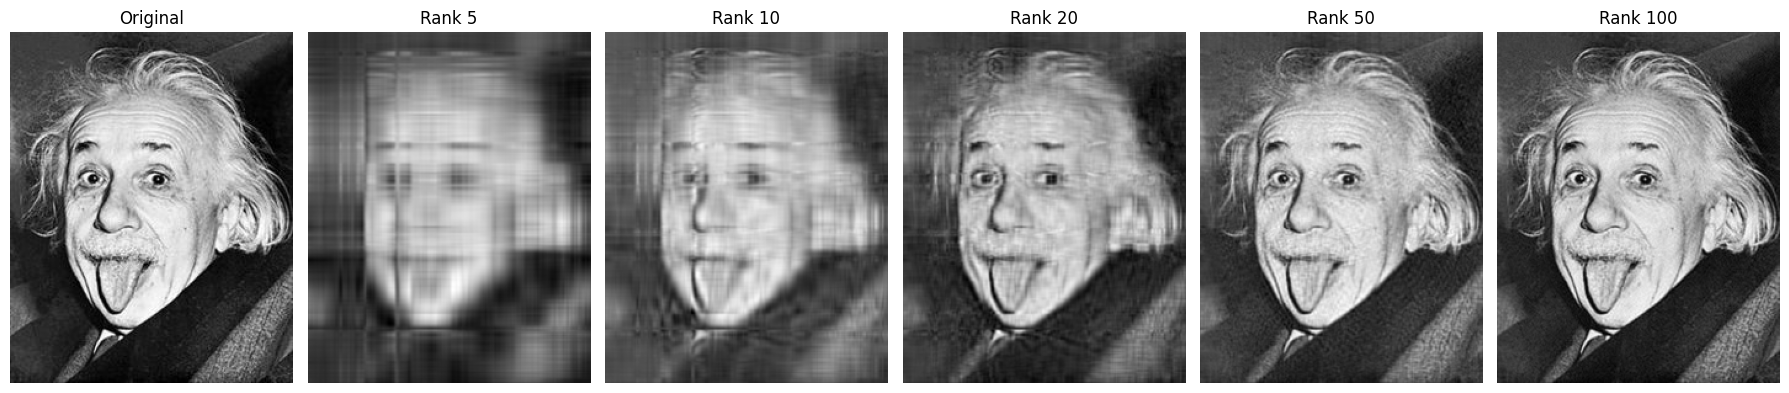

sum of percentages: 99.99999999999999


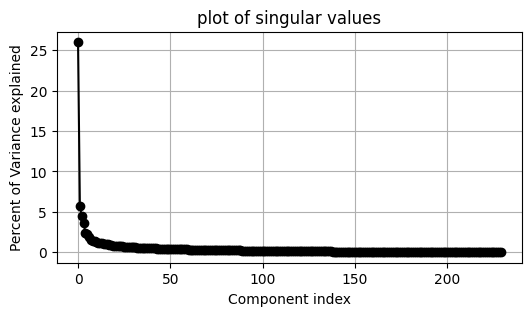

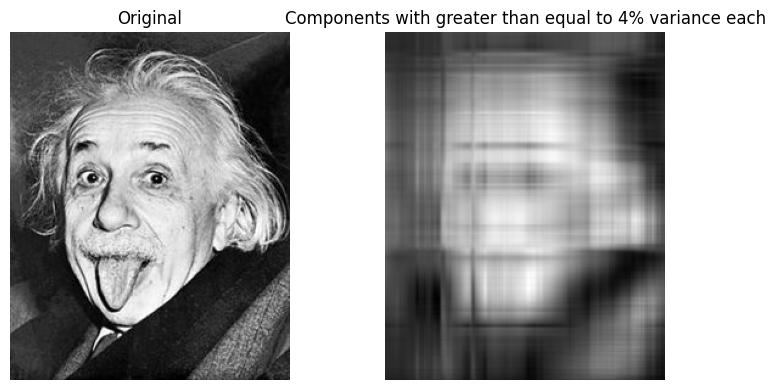

Threshold = 4% keeps 3 components out of 230.


In [ ]:
#Exercise 1
#Exercise 1a
ranks_to_show = [5, 10, 20, 50, 100]#list ranks of SV to test reconstructions

num_panels = 1 + len(ranks_to_show) #number of subplot columns
plt.figure(figsize=(3*num_panels, 4)) #creates figure for side comparison

#shows orginal image in panel 1
plt.subplot(1, num_panels, 1)
plt.imshow(pic, cmap="gray")
plt.title("Original")
plt.axis("off")

#loops each rank value and reconstruct low rank image
for i, r in enumerate(ranks_to_show):
    #rebuild using only first r SV
    lowrank_r = U[:, :r] @ np.diag(s[:r]) @ Vt[:r, :]

    #place each reconstruction in subplot grid
    plt.subplot(1, num_panels, i+2)
    plt.imshow(lowrank_r, cmap="gray")
    plt.title(f"Rank {r}")
    plt.axis("off")

plt.tight_layout() #improves spacing between plots
plt.show()#show plot

s_percent = 100 * s / np.sum(s) #convert SV to percent variance
print("sum of percentages:", np.sum(s_percent)) #prints/check percent
plt.figure(figsize=(6,3)) #plot a 6x3 plot
plt.plot(s_percent, "ko-")
plt.xlabel("Component index") #print x title
plt.ylabel("Percent of Variance explained")#print y title
plt.title("plot of singular values")#print title
plt.grid(True)
plt.show()#shows plot

#Exercise 1b
thresh = 4 #choose threshold % for variance explained
mask = s_percent > thresh#creates boolean of SV that exceed threshold
I, J = np.ix_(mask, mask) #Select rows/columns of U,S,Vt to pass threshold

#reconstruct low-rank image using only components above threshold
lowrank_thresh = np.squeeze(U[:, J] @ S[I, J] @ Vt[J, :])
plt.figure(figsize=(8,4)) #creates a figure for side comparison

plt.subplot(1,2,1)#left panel is the original
plt.imshow(pic, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2) #right panel is the threshold based reconstruction
plt.imshow(lowrank_thresh, cmap="gray")
plt.title(f"Components with greater than equal to {thresh}% variance each")
plt.axis("off")

plt.tight_layout()#adjust spacing
plt.show() #display comparison figure

num_kept = np.sum(mask) #counts DV that survived threshold
#prints how many components were kept out of total
print(f"Threshold = {thresh}% keeps {num_kept} components out of {len(s)}.")

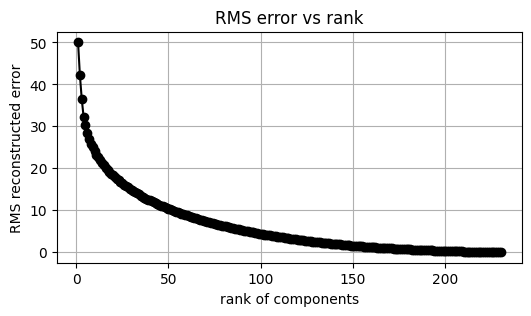

In [ ]:
#Exercise 2
rmax = len(s) #totla number of SV

RMS = np.zeros(rmax) #creates array to store RMS error of each matrix
for si in range(rmax):#compute RMS error using the first i SV
    #convert index to number of components
    i = si + 1
    #reconstructs using top i SV
    lowrank_i = U[:, :i] @ np.diag(s[:i]) @ Vt[:i, :]
    diffimg = lowrank_i - pic #computes reconstructed minus original
    RMS[si] = np.sqrt(np.mean(diffimg.flatten()**2))

#plots RMS error vs. number of components kept
plt.figure(figsize=(6,3)) #creates a 6x3 figure size
plt.plot(np.arange(1, rmax+1), RMS, "ko-")
plt.xlabel("rank of components") #x title
plt.ylabel("RMS reconstructed error")#y title
plt.title("RMS error vs rank") #title
plt.grid(True)
plt.show()#show plot



Evaluation of Exercise 1a:
One can see that after reviewing its output that when the rank is small such as when inputting in 5 or 10, the reconstruction of tends to be quite blurry with major shapes of the face shows. However, it gets more detailed when increasing the number of components. And in 100 its close to how the image originally looks, Thus the higher the rank the higher the quality but with diminishing returns.

Evaluation of Exercise 1b:
Choosing a threshold of 4% shows an an impact on the image such as it keeps only the components that individually explains a large amount of variance. In the reconstructio, we see very similar outcome in quality compared to original, thus the most important structure of the image is captured only a few dominant singular values. Furthermore, in lower thresholds many small compoents add only minor details.

Evaluation of Exercise 2:
Looking at the plot, the RMS error decreases when the number ranks components increase, which matches the plot from exercise 1. The largest drop in error can be seen where in the 1a plot shows its largest singular value. In addition, when adding more components would create only a small reduction in RMS error.